In [8]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
from matplotlib.font_manager import fontManager, FontProperties

path = "MYRIADPRO-REGULAR.OTF"
fontManager.addfont(path)
prop = FontProperties(fname=path)

In [10]:
#np.save('circleimages.npy', circleimages)
#np.save('AAT_ratings.npy', AAT_ratings)
#np.save('MAT_avg_matrix.npy', MAT_avg)

In [11]:
# load the stimulus images 
circleimages = np.load('circleimages.npy')
AAT_ratings = np.load('AAT_ratings.npy')
MAT_avg = np.load('MAT_avg_matrix.npy')

In [12]:
# exclude one participant with binary ratings
AAT_includes = AAT_ratings[:,0:33]
# group mean of AAT score
AATavg = np.mean(AAT_includes,axis=1)
AATstd = np.std(AAT_includes,axis=1)

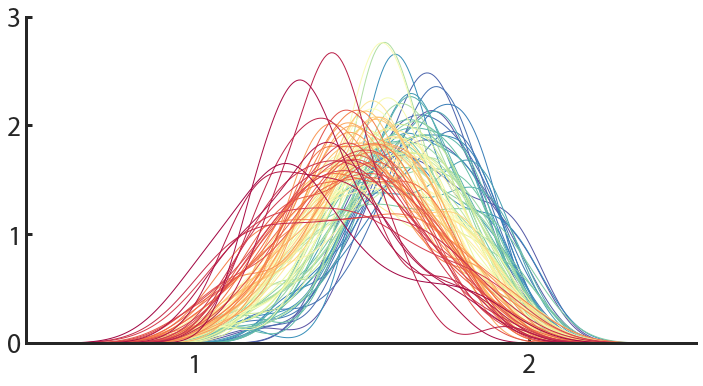

In [13]:
# individual distribution of ratinbgs
AAT_includes_sorted = AAT_includes[np.argsort(AATavg),:]
sns.set(font_scale=2.5,style="ticks",rc={'figure.figsize':(12,6)},font=prop.get_name())
#ax_dist= sns.displot(AAT_ratings[:,0:33], kind="kde", aspect=15/8)
ax_dist=sns.kdeplot(
   data=AAT_includes_sorted.T,bw_adjust=1,
   fill=True, common_norm=False, palette="Spectral",
   alpha=0, linewidth=1,
)
ax_dist.legend_.remove()
#ax_dist.set(ylabel='Density', xlabel='Aesthetic Ratings')
ax_dist.set(ylabel='', xlabel='')
ax_dist.set(ylim=(0,3), yticks=[0,1,2,3])
ax_dist.set(xlim=(0.5,2.5), xticks=[1,2])
ax_dist.tick_params(axis="y",direction="in", pad=5,width=3)
ax_dist.tick_params(axis="x",direction="in", pad=10,width=3)
ax_dist.spines['bottom'].set_linewidth(3)
ax_dist.spines['left'].set_linewidth(3)
sns.despine()

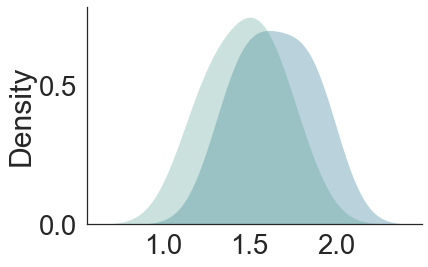

In [14]:
sns.set_context("talk")
sns.set(font_scale=2.5,style="white",rc={'figure.figsize':(6,4)})
sns.kdeplot(data=AAT_ratings[(55,95),0:33].T,legend=False,bw_adjust=1.5,fill=True, palette="crest", alpha=.3, linewidth=0)
sns.despine()

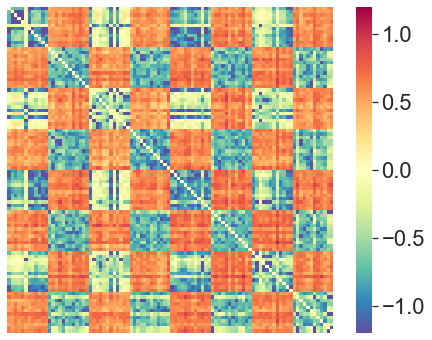

In [15]:
sns.set(font_scale=2,style="white")
f,ax=plt.subplots(figsize=(8,6))
#cmap = sns.diverging_palette(220, 10, as_cmap = True)
#cmap = sns.color_palette("viridis", as_cmap=True)
cmap = sns.color_palette(palette="Spectral_r", as_cmap=True)
ax_mat = sns.heatmap(MAT_avg,cmap=cmap,vmin=-1.2,vmax=1.2,center=0,square=True,linewidths=0.001,annot=False,xticklabels=False,yticklabels=False)

In [16]:
pca_MAT = PCA(n_components=10)
pca_MAT.fit(MAT_avg)
MAT_pc= pca_MAT.transform(MAT_avg)

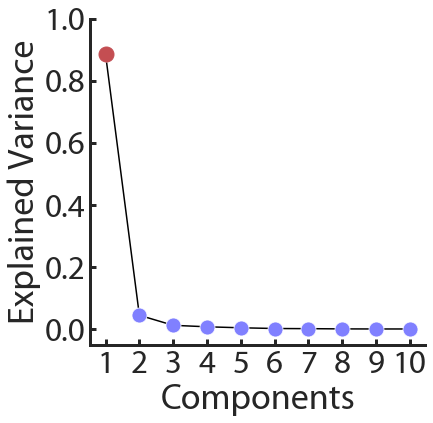

In [17]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.lineplot(x=range(1, len(pca_MAT.explained_variance_ratio_) + 1), y=pca_MAT.explained_variance_ratio_, markers=True,marker='o',markersize=15,markerfacecolor='#8080ff',color='black')
plt.plot(1, pca_MAT.explained_variance_ratio_[0], 'ro',markersize=15) # 'bo' means blue circle marker

ax.set(xlabel='Components', ylabel='Explained Variance')
ax.set(xticks=[1,2,3,4,5,6,7,8,9,10])
ax.set(ylim=(-0.05, 1), yticks=[0,0.2,0.4,0.6,0.8,1])
ax.tick_params(axis="y",direction="in", pad=5, width=3)
ax.tick_params(axis="x",direction="in", pad=5, width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

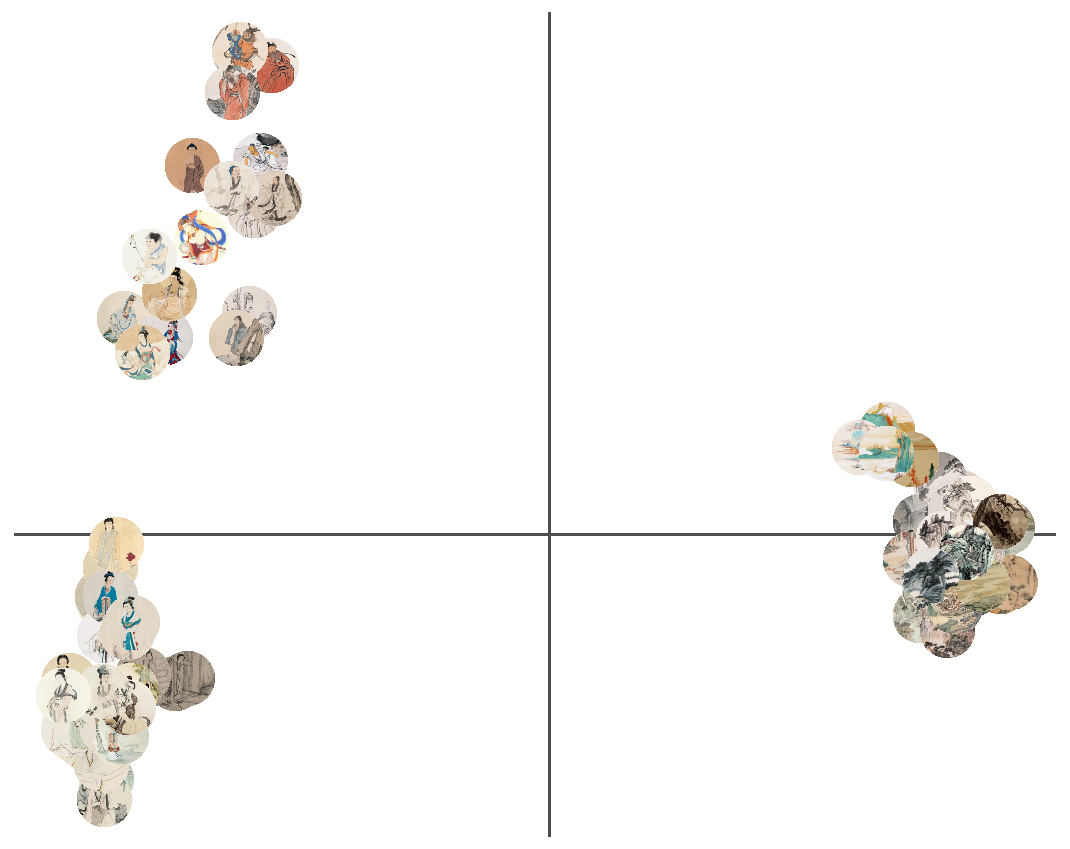

In [20]:
sns.set_style("white")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(15, 12))
ax.scatter(-MAT_pc[:, 0], MAT_pc[:, 1])
ax.set(xticklabels=[],xlabel=None,yticklabels=[],ylabel=None)
ax.axhline(0, color=".3", linewidth=3)
ax.axvline(0, color=".3", linewidth=3)
for x0, y0, img in zip(-MAT_pc[:, 0], MAT_pc[:, 1], circleimages):
    # set the background outside circle as transparent
    alpha = ~np.all(img == 255, axis=2) * 255
    img[:, :, 3] = alpha

    # plot single image
    im = OffsetImage(img, zoom=0.15)
    ab = AnnotationBbox(im, (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.axis('on')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

In [11]:
res = np.corrcoef(AAT_includes)
pca_res = PCA(n_components=10)
pca_res.fit(res)
AAT_pc = pca_res.transform(res)

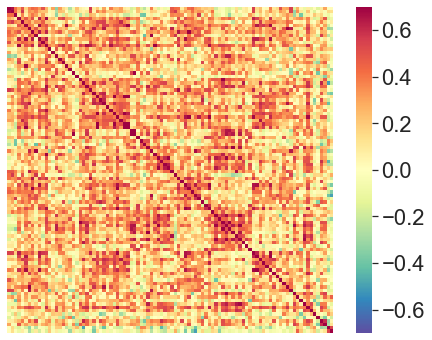

In [12]:
sns.set(font_scale=2,style="white")
f,ax=plt.subplots(figsize=(8,6))
cmap = sns.color_palette("Spectral_r", as_cmap=True)
ax_mat = sns.heatmap(res,cmap=cmap,vmin=-0.7,vmax=0.7,center=0,square=True,linewidths=0.001,annot=False,xticklabels=False,yticklabels=False)

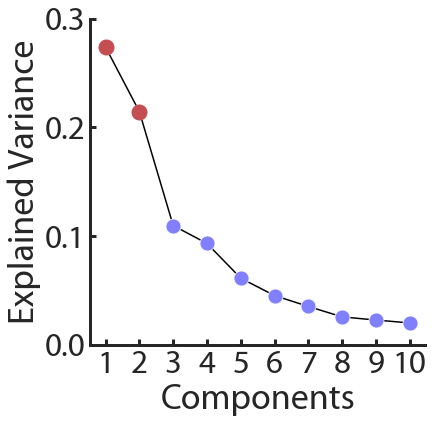

In [13]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.lineplot(x=range(1, len(pca_res.explained_variance_ratio_) + 1), y=pca_res.explained_variance_ratio_, markers=True,marker='o',markersize=15, markerfacecolor='#8080ff',color='black')
plt.plot(1, pca_res.explained_variance_ratio_[0], 'ro',markersize=15) # 'bo' means blue circle marker
plt.plot(2, pca_res.explained_variance_ratio_[1], 'ro',markersize=15) # 'bo' means blue circle marker

ax.set(xlabel='Components', ylabel='Explained Variance')
ax.set(xticks=[1,2,3,4,5,6,7,8,9,10])
ax.set(ylim=(0, 0.3), yticks=[0,0.1,0.2,0.3])
ax.tick_params(axis="y",direction="in", pad=5, width=3)
ax.tick_params(axis="x",direction="in", pad=5, width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

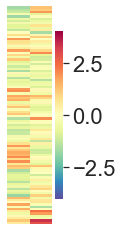

In [14]:
sns.set(font_scale=2,style="white")
f,ax=plt.subplots(figsize=(1,4))
cmap = sns.color_palette("Spectral_r", as_cmap=True)
ax_mat = sns.heatmap(AAT_pc[:,0:2],cmap=cmap,vmin=-4,vmax=4,center=0,square=False,linewidths=0.001,annot=False,xticklabels=False,yticklabels=False)

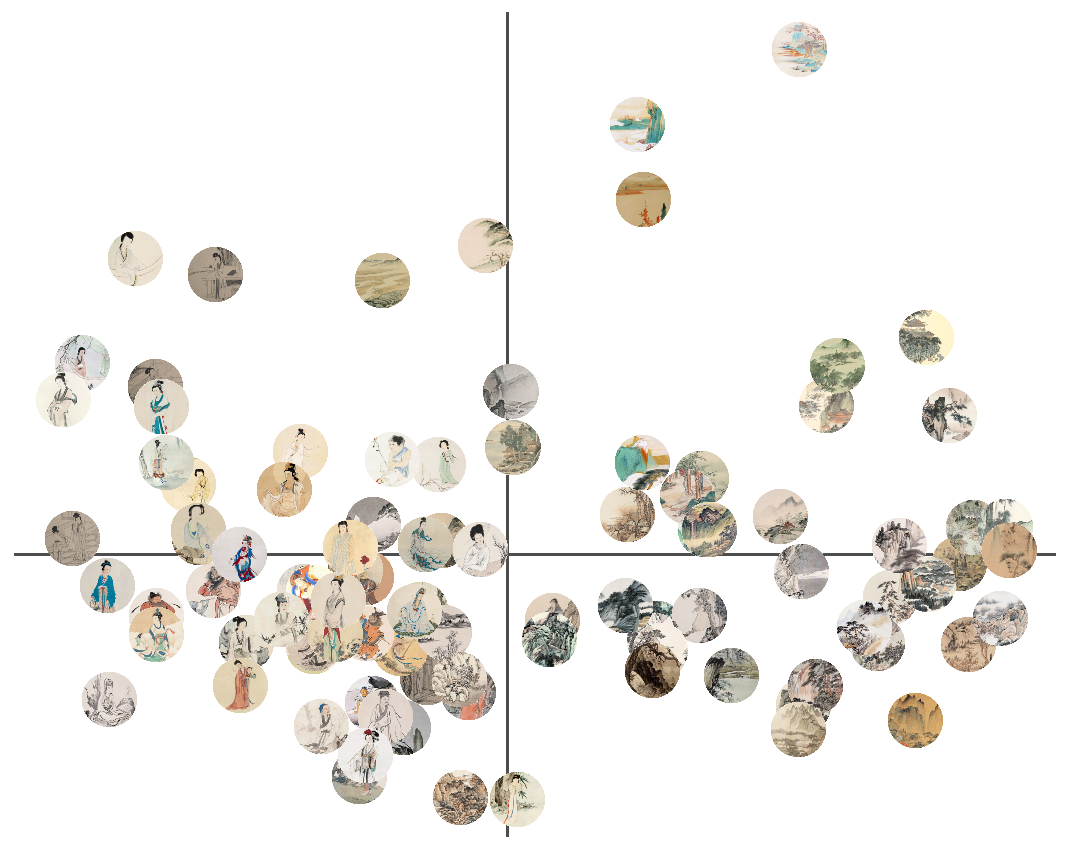

In [16]:
sns.set_style("white")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(15, 12))
ax.scatter(AAT_pc[:, 0], AAT_pc[:, 1])
ax.set(xticklabels=[],xlabel=None,yticklabels=[],ylabel=None)
ax.axhline(0, color=".3", linewidth=3)
ax.axvline(0, color=".3", linewidth=3)
for x0, y0, img in zip(AAT_pc[:, 0], AAT_pc[:, 1], circleimages):
    # set the background outside circle as transparent
    alpha = ~np.all(img == 255, axis=2) * 255
    img[:, :, 3] = alpha

    # plot single image
    im = OffsetImage(img, zoom=0.15)
    ab = AnnotationBbox(im, (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.axis('on')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

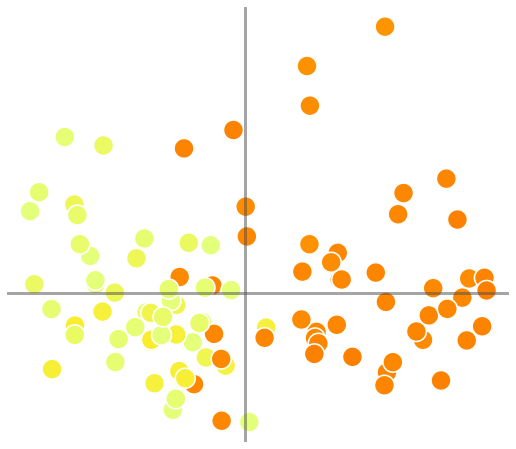

In [17]:
sns.set_style("white")
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(9,8))
#cmap = sns.color_palette("Spectral_r", as_cmap=True)
cmap = sns.color_palette("Wistia_r", as_cmap=True)
ax.axhline(0, color=".3", alpha=0.5, linewidth=3)
ax.axvline(0, color=".3", alpha=0.5, linewidth=3)
sns.scatterplot(x=AAT_pc[:,0], y=AAT_pc[:,1], hue=MAT_pc[:,0],palette=cmap,s=400, hue_norm=(-7, 7),legend='brief',alpha=1)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xticklabels=[],xlabel=None,yticklabels=[],ylabel=None)
ax.legend_.remove()
sns.despine(top=True, right=True, left=True, bottom=True)

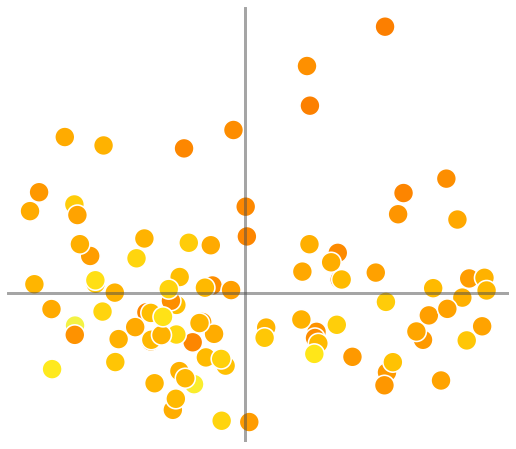

In [18]:
sns.set_style("white")
sns.set_context("talk")
cmap = sns.color_palette("Wistia", as_cmap=True)
fig, ax = plt.subplots(figsize=(9,8))
ax.axhline(0, color=".3", alpha=0.5, linewidth=3)
ax.axvline(0, color=".3", alpha=0.5, linewidth=3)
sns.scatterplot(x=AAT_pc[:,0], y=AAT_pc[:,1], hue=AATavg,palette=cmap,s=400, hue_norm=(1.3, 1.7))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.legend_.remove()
ax.set(xticklabels=[],xlabel=None,yticklabels=[],ylabel=None)
sns.despine(top=True, right=True, left=True, bottom=True)

In [19]:
AIscore = scipy.io.loadmat('../MUSIQ_AVA_score.mat')

In [20]:
df_dims = pd.DataFrame({'A_avg':AATavg,'A_std':AATstd,
                       'AAT_pc1':AAT_pc[:,0],'AAT_pc2':AAT_pc[:,1],
                       'MAT_pc1':-MAT_pc[:,0],'MAT_pc2':MAT_pc[:,1],
                       'Category':np.tile(np.repeat(['Portrait','Landscape'],12),4),
                       'Artists':np.repeat(['A1','A2','A3','A4'],24),
                       'AIscore':AIscore['AIscore'][:,0]})

/Users/liangxinyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'MAT_pc1'

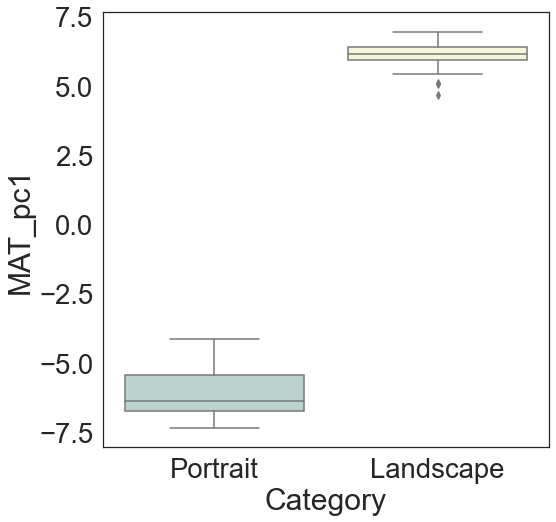

In [21]:
sns.set(font_scale=2.5,style="white",rc={'figure.figsize':(8,8)})
ax = sns.boxplot(x="Category", y="MAT_pc1",data=df_dims,palette=["#b7d6d2","#f8fbd7"])
sns.stripplot(df_dims, x="Category", y="MAT_pc1", size=10,color='grey')
ax.set(xlabel='', ylabel='')
sns.despine()

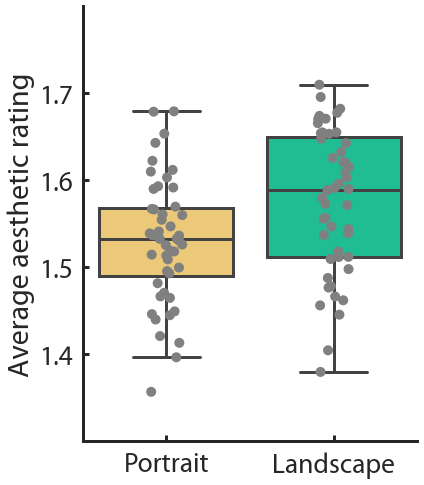

In [22]:
sns.set(font_scale=2.5,style="ticks",rc={'figure.figsize':(6,8)},font=prop.get_name())
ax_2g = sns.boxplot(data=df_dims, x='Category', y='A_avg',palette=["#ffd166",'#06d6a0'],linewidth=3, fliersize=0)
sns.stripplot(data=df_dims, x='Category', y='A_avg', size=10,color='gray')
ax_2g.set(ylabel='Average aesthetic rating', xlabel='')
ax_2g.tick_params(axis='x', direction="in", pad=10,width=3)
ax_2g.tick_params(axis="y",direction="in", pad=10,width=3)
ax_2g.set(ylim=(1.3,1.8), yticks=[1.4,1.5,1.6,1.7])
ax_2g.spines['bottom'].set_linewidth(3)
ax_2g.spines['left'].set_linewidth(3)
sns.despine()

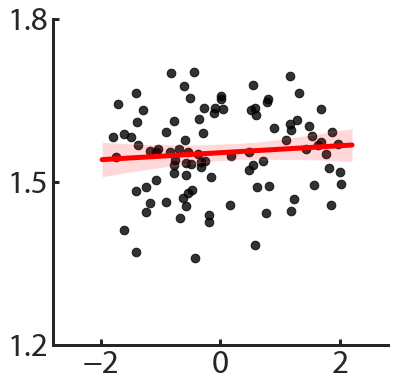

In [23]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.regplot(data=df_dims,x='AAT_pc1',y='A_avg',y_partial='MAT_pc1', color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-2.8, 2.8), xticks=[-2,0,2])
ax.set(ylim=(1.2, 1.8), yticks=[1.2,1.5,1.8])
ax.tick_params(axis="y",direction="in", pad=5,width=3)
ax.tick_params(axis="x",direction="in", pad=5,width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

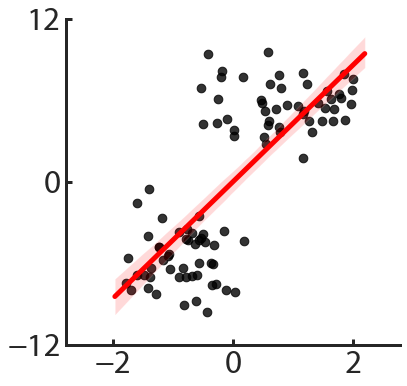

In [24]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.regplot(data=df_dims,x='AAT_pc1',y='MAT_pc1',y_partial='A_avg',color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-2.8, 2.8), xticks=[-2,0,2])
ax.set(ylim=(-12, 12), yticks=[-12,0,12])
ax.tick_params(axis="y",direction="in", pad=5, width=3)
ax.tick_params(axis="x",direction="in", pad=5, width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

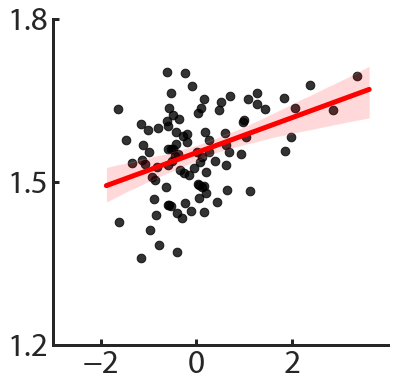

In [25]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.regplot(data=df_dims,x='AAT_pc2',y='A_avg',y_partial='MAT_pc1',color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-3, 4), xticks=[-2,0,2])
ax.set(ylim=(1.2, 1.8), yticks=[1.2,1.5,1.8])
ax.tick_params(axis="y",direction="in", pad=5, width=3)
ax.tick_params(axis="x",direction="in", pad=5, width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

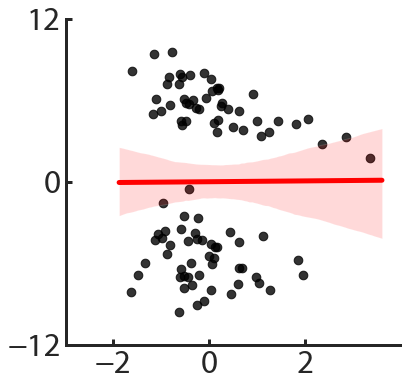

In [26]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.regplot(data=df_dims,x='AAT_pc2',y='MAT_pc1',y_partial='A_avg',color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-3, 4), xticks=[-2,0,2])
ax.set(ylim=(-12, 12), yticks=[-12,0,12])
ax.tick_params(axis="y",direction="in", pad=5, width=3)
ax.tick_params(axis="x",direction="in", pad=5, width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

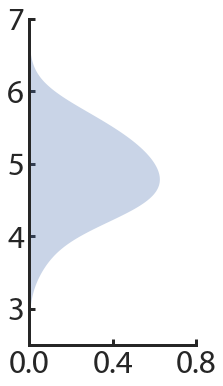

In [29]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(3,6)},font=prop.get_name())
ax = sns.kdeplot(data=df_dims,y ='AIscore',legend=False,bw_adjust=1.5,fill=True, alpha=.3, linewidth=0)
ax.set(ylim=(2.5,7), yticks=[3,4,5,6,7])
ax.set(xlim=(0,0.8), xticks=[0,0.4,0.8])
ax.set(xlabel='', ylabel='')
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=5)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(width=3)
sns.despine()

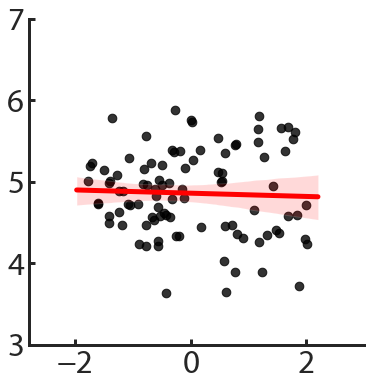

In [30]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.regplot(data=df_dims,x='AAT_pc1',y='AIscore',y_partial='MAT_pc1', color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-2.8, 3), xticks=[-2,0,2])
ax.set(ylim=(3, 7), yticks=[3,4,5,6,7])
ax.tick_params(axis="y",direction="in", pad=5,width=3)
ax.tick_params(axis="x",direction="in", pad=5,width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()

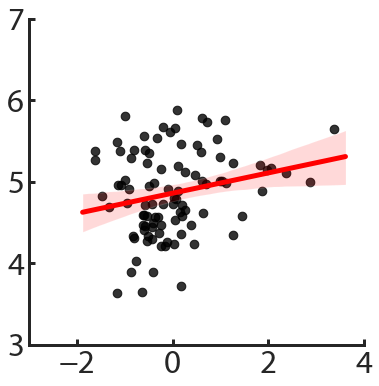

In [31]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,6)},font=prop.get_name())
ax=sns.regplot(data=df_dims,x='AAT_pc2',y='AIscore',y_partial='MAT_pc1', color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-3, 4), xticks=[-2,0,2,4])
ax.set(ylim=(3, 7), yticks=[3,4,5,6,7])
ax.tick_params(axis="y",direction="in", pad=5,width=3)
ax.tick_params(axis="x",direction="in", pad=5,width=3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
sns.despine()